In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

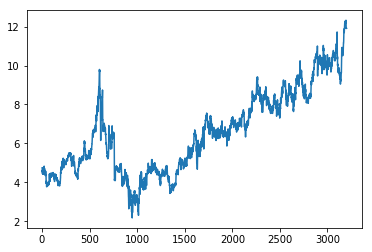

In [2]:
file = 'Data/Stocks/amswa.us.txt'
data = pd.read_csv(file)
data = data[2:]

#data = data[data.Date > '2015-01-01']
plt.plot(data.Close)
plt.show()

In [3]:
def getsma(data):
    sma = data.uho5.iloc[0] - data.uho21.iloc[0]
    return sma

In [4]:
def getema(data):
    ema = data.uho5.iloc[0] - data.uho21.iloc[0]
    return ema

In [5]:
def getbollinger(data):
    diff = data.Close.iloc[0] - data.downBand.iloc[0]
    
    if diff < 0:
        blngbnd = (diff/(data.upBand.iloc[0] - data.downBand.iloc[0])) * 100
    else:
        blngbnd = (diff/(data.upBand.iloc[0] - data.downBand.iloc[0])) * 100

    return blngbnd

In [6]:
# indikatör sonuçlarını sayısal değer olarak elde etme
def getresults(data):
    sma = getsma(data)
    ema = getema(data)
    blngbnd = getbollinger(data)
    
    return sma, ema, blngbnd

In [7]:
sma = []
ema = []
blngbnd = []

for date in data.Date:
    sma1, ema1, blngbnd1 = getresults(data[data.Date == date])
    sma.append(sma1)
    ema.append(ema1)
    blngbnd.append(blngbnd1)
    
try:
    data.insert(0, 'sma', sma)
    data.insert(0, 'ema', ema)
    data.insert(0, 'blngbnd', blngbnd)
except:
    data = data.drop(columns=['sma', 'ema', 'blngbnd'])
    data.insert(0, 'sma', sma)
    data.insert(0, 'ema', ema)
    data.insert(0, 'blngbnd', blngbnd)

In [8]:
print(data.columns, '\n\n')
a = []
for col in data.columns:
    if 'Unnamed' in col:
        a.append(col)
data = data.drop(columns=a)
print(data.columns)

Index(['blngbnd', 'ema', 'sma', 'Unnamed: 0', 'desindic', 'downBand', 'upBand',
       'sigma', 'bho20', 'rsi', 'uho21', 'uho5', 'bho21', 'bho5', 'Date',
       'Close'],
      dtype='object') 


Index(['blngbnd', 'ema', 'sma', 'desindic', 'downBand', 'upBand', 'sigma',
       'bho20', 'rsi', 'uho21', 'uho5', 'bho21', 'bho5', 'Date', 'Close'],
      dtype='object')


In [9]:
# SAVE
data.to_csv(file, sep=',')